In [1]:
import pandas as pd
import numpy as np

### Read dictionary
The first 3 lines are comments
- Downloaded from: https://hpo.jax.org/app/download/annotation 
- http://compbio.charite.de/jenkins/job/hpo.annotations/lastStableBuild/

In [2]:
df_hpo2 = pd.read_table(r'hpo/phenotype.hpoa', sep='\t', header=4, encoding = "ISO-8859-1")
print('Nr of HPO codes:', len(df_hpo2))
df_hpo2.head()

Nr of HPO codes: 199197


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#DatabaseID,DiseaseName,Qualifier,HPO_ID,Reference,Evidence,Onset,Frequency,Sex,Modifier,Aspect,Biocuration
0,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0000007,OMIM:210100,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
1,OMIM:210100,"BETA-AMINOISOBUTYRIC ACID, URINARY EXCRETION OF",NaN,HP:0003355,OMIM:210100,IEA,NaN,NaN,NaN,NaN,P,HPO:skoehler[2009-02-17]
2,OMIM:163600,NIPPLES INVERTED,NaN,HP:0000006,OMIM:163600,IEA,NaN,NaN,NaN,NaN,I,HPO:iea[2009-02-17]
3,OMIM:163600,NIPPLES INVERTED,NaN,HP:0003186,OMIM:163600,IEA,NaN,NaN,NaN,NaN,P,HPO:iea[2009-02-17]
4,OMIM:615763,"#615763 CORTICAL DYSPLASIA, COMPLEX, WITH OTHE...",NaN,HP:0002365,OMIM:615763,TAS,NaN,HP:0040283,NaN,NaN,P,HPO:skoehler[2014-08-24]


In [3]:
len(df_hpo2['DiseaseName'].unique()) 

16950

In [18]:
df_hpo2['HPO_ID'].value_counts().median()

4.0

(array([8.843e+03, 1.580e+02, 4.300e+01, 1.900e+01, 8.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([1.00000e+00, 1.52160e+02, 3.03320e+02, 4.54480e+02, 6.05640e+02,
        7.56800e+02, 9.07960e+02, 1.05912e+03, 1.21028e+03, 1.36144e+03,
        1.51260e+03, 1.66376e+03, 1.81492e+03, 1.96608e+03, 2.11724e+03,
        2.26840e+03, 2.41956e+03, 2.57072e+03, 2.72188e+03, 2.87304e+03,
        3.02420e+03, 3.17536e+03, 3.32652e+03, 3.47768e+03, 3.62884e+03,
        3.78000e+03]),
 <a list of 25 Patch objects>)

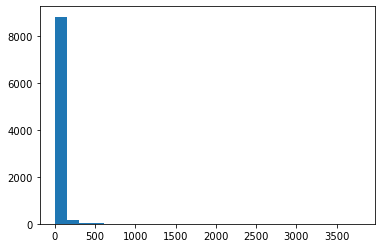

In [16]:
import matplotlib.pyplot as plt
plt.hist(df_hpo2['HPO_ID'].value_counts(), bins=25)#.sort_index()

In [5]:
import networkx
import obonet
import DeepPhenotyping_functions as func

url = 'phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)
hpo_to_umls, umls_to_hpo = func.HPO_to_UMLS(graph)

In [6]:
#graph.get('HP:0000002') # HP:0000002
graph.nodes['HP:0005101']

{'name': 'High-frequency hearing impairment',
 'alt_id': ['HP:0008522', 'HP:0008584', 'HP:0008597'],
 'def': '"A type of hearing impairment affecting primarily the higher frequencies of sound (3,000 to 6,000 Hz)." [HPO:probinson]',
 'comment': 'High frequency hearing impairment often involves loss of ability to hear consonants such as s, f, t, and z, even though vowels can be heard normally.',
 'synonym': ['"Hearing loss, high-frequency" EXACT layperson []',
  '"High frequency hearing loss" EXACT layperson []',
  '"High-frequency deafness" EXACT []',
  '"Progressive high frequency hearing loss" EXACT layperson []',
  '"Progressive high-frequency hearing loss" EXACT []'],
 'xref': ['MSH:D006316',
  'SNOMEDCT_US:232326009',
  'SNOMEDCT_US:48758008',
  'UMLS:C0018780'],
 'is_a': ['HP:0000365'],
 'created_by': 'peter',
 'creation_date': '2008-03-25T05:03:00Z'}

## read genes to calculate occurence

In [2]:
import pandas as pd
df_hpo = pd.read_table(r'hpo/util/annotation/phenotype_to_genes.txt', sep='\t|<tab>', engine='python') # phenotype_to_genes.txt
df_hpo.head()

,#Format: HPO-id,HPO label,entrez-gene-id,entrez-gene-symbol,Additional Info from G-D source,G-D source,disease-ID for link
0,HP:0000002,Abnormality of body height,26229,B3GAT3,-,mim2gene,OMIM:245600
1,HP:0000002,Abnormality of body height,2892,GRIA3,NaN,orphadata,ORPHA:364028
2,HP:0000002,Abnormality of body height,64374,SIL1,NaN,orphadata,ORPHA:559
3,HP:0000002,Abnormality of body height,10588,MTHFS,-,mim2gene,OMIM:618367
4,HP:0000002,Abnormality of body height,51633,OTUD6B,-,mim2gene,OMIM:617452


In [3]:
print('Nr of genes: ', len(df_hpo))

Nr of genes:  841750


In [4]:
df_hpo['Additional Info from G-D source'].unique()

array(['-', nan, 'question', 'susceptibility', 'susceptibility; question',
       'susceptibility; modifier', 'susceptibility; modifier; question',
       'susceptibility; QTL 1', 'susceptibility; somatic'], dtype=object)

In [ ]:
ax = sns.boxplot(x="score", y="score_ent", data=df3)

(array([8.442e+03, 3.010e+02, 9.300e+01, 5.100e+01, 4.200e+01, 2.900e+01,
        2.400e+01, 1.600e+01, 1.100e+01, 1.500e+01, 4.000e+00, 8.000e+00,
        0.000e+00, 6.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00]),
 array([1.00000e+00, 2.75040e+02, 5.49080e+02, 8.23120e+02, 1.09716e+03,
        1.37120e+03, 1.64524e+03, 1.91928e+03, 2.19332e+03, 2.46736e+03,
        2.74140e+03, 3.01544e+03, 3.28948e+03, 3.56352e+03, 3.83756e+03,
        4.11160e+03, 4.38564e+03, 4.65968e+03, 4.93372e+03, 5.20776e+03,
        5.48180e+03, 5.75584e+03, 6.02988e+03, 6.30392e+03, 6.57796e+03,
        6.85200e+03]),
 <a list of 25 Patch objects>)

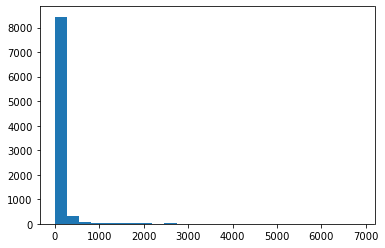

In [56]:
import matplotlib.pyplot as plt
plt.hist(df_hpo['#Format: HPO-id'].value_counts(), bins=25)#.sort_index()

In [7]:
df_hpo['#Format: HPO-id'].value_counts().mean()

92.89813486370157

In [8]:
df_hpo['#Format: HPO-id'].value_counts().median()

8.0

In [22]:
df_hpo.groupby('#Format: HPO-id')['entrez-gene-id'].nunique()[df_hpo.groupby('#Format: HPO-id')['entrez-gene-id'].nunique() == df_hpo.groupby('#Format: HPO-id')['entrez-gene-id'].nunique().max()]

#Format: HPO-id
HP:0000707    3276
Name: entrez-gene-id, dtype: int64

In [23]:
df_hpo.groupby('#Format: HPO-id')['entrez-gene-id'].nunique().median()


7.0

In [24]:
df_hpo.groupby('#Format: HPO-id')['entrez-gene-id'].nunique().mean()

64.07758525549056

## Extracting data from scientific article

In [4]:
import urllib.request
import nltk

user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'


url = "https://www.cell.com/ajhg/fulltext/S0002-9297(17)30459-7"
#cookies = {'required_cookie': required_value}
headers={'User-Agent':user_agent,} 
cookieProcessor = urllib.request.HTTPCookieProcessor()
opener = urllib.request.build_opener(cookieProcessor)

request=urllib.request.Request(url,None, headers) #The assembled request
response = opener.open(request,timeout=100)
data = response.read() # The data u need

### Find any tables

In [3]:
from PIL import __version__ as vers
print(vers)

7.2.0


In [5]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(data)

table = soup.find('table') # what if there are more tables?


In [6]:
import pandas as pd
import numpy as np

def tableDataText(table):    
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    def rowgetDataText(tr, coltag='td'): # td (data) or th (header)       
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]  
    rows = []
    trs = table.find_all('tr')
    headerow = rowgetDataText(trs[0], 'th')
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(rowgetDataText(tr, 'td') ) # data row       
    return rows

def parseTable(table, remove_inc=True):
    """
    Convert Table to pandas Dataframe
    
    Input:
        table = html table from article
        remove_inc = remove rows with incosistent length
            (be careful: these can be helpful to categorize table)
    """
    list_table = tableDataText(table)
    dftable = pd.DataFrame(list_table[1:], columns=list_table[0])
    if remove_inc:
        med = np.median(dftable.isnull().sum(axis=1).values)
        dftable = dftable.dropna(thresh=len(dftable.columns)-med)
    return dftable

raw_table = parseTable(table)

In [ ]:
def hpo_column_recognition(): 
    for col in columns: 
        # each column is checked seperately
        if col == hpo:
    return

In [7]:
raw_table.head()

,Case ID,Inheritance,Gender,Age (Years),Prenatal and Neonatal History,PN Growth Retardation,Microcephaly,Motor Delay,Speech Delay,DD/ ID,"Behavioral, Psychiatric, and Neurological Features",Malformations and Physical Anomalies,Additional Comments
1,I,DN,M,4,SGA and feeding difficulties,Y,N,Y,Y,mod,possible absence and focal seizures,"VSD with tortuous aortic arch, horseshoe kidne...","early-onset hypothyroidism, limitation of join..."
2,II,DN,M,7,SGA and feeding difficulties,Y,N,Y,Y,mild,"sociable, empathetic, hand flapping tendency a...","Rt pelvic kidney, Rt inguinal hernia and scoli...","GOR, asthma and allergies."
3,III,DN,M,7,"SGA, polycythaemia, jaundice and hypoglycaemia...",Y,Y,N,Y,Mild,"attention deficit, echolalia and tantrums.","inguinal hernia, cryptorchidism, proximally pl...","perineal and scalp abscesses, recurrent chest ..."
4,IVa,Mat,F,32,SGA,Y,N,Y,Y,mod,empathetic personality.,scoliosis,"glaucoma, asthma, and eczema"
5,IVb,U,F,68,U,U,U,U,U,mild,U,horseshoe kidney with multiple cysts,hiatus hernia


In [45]:
raw_table.to_csv(r'data/TableExtraction.csv', index=False)

## Find pdfs of file (supplementary)

In [1]:
suppl_flags = ['Supporting Information', 'Supplementary Information', 'Supplemental Files', 'Supplementary', 'Supplementals', 'Supporting Files']

raw_table.to_csv(r'data/pdfs/TableExtraction.csv', index=False)

## Importing Table Extraction

In [46]:
raw_table = pd.read_csv(r'data/TableExtraction.csv')
raw_table.head()

,Case ID,Inheritance,Gender,Age (Years),Prenatal and Neonatal History,PN Growth Retardation,Microcephaly,Motor Delay,Speech Delay,DD/ ID,"Behavioral, Psychiatric, and Neurological Features",Malformations and Physical Anomalies,Additional Comments
0,I,DN,M,4,SGA and feeding difficulties,Y,N,Y,Y,mod,possible absence and focal seizures,"VSD with tortuous aortic arch, horseshoe kidne...","early-onset hypothyroidism, limitation of join..."
1,II,DN,M,7,SGA and feeding difficulties,Y,N,Y,Y,mild,"sociable, empathetic, hand flapping tendency a...","Rt pelvic kidney, Rt inguinal hernia and scoli...","GOR, asthma and allergies."
2,III,DN,M,7,"SGA, polycythaemia, jaundice and hypoglycaemia...",Y,Y,N,Y,Mild,"attention deficit, echolalia and tantrums.","inguinal hernia, cryptorchidism, proximally pl...","perineal and scalp abscesses, recurrent chest ..."
3,IVa,Mat,F,32,SGA,Y,N,Y,Y,mod,empathetic personality.,scoliosis,"glaucoma, asthma, and eczema"
4,IVb,U,F,68,U,U,U,U,U,mild,U,horseshoe kidney with multiple cysts,hiatus hernia


In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(data)
raw = soup.get_text()



In [4]:
print('Main text spanning from:', raw.find('Main Text'), 'to', raw.find('Acknowledgments'))

Main text spanning from: 13350 to 57531


In [48]:
tokens = nltk.word_tokenize(raw)

In [5]:
import spacy
nlp = spacy.load("en_core_sci_sm")



AttributeError: 'English' object has no attribute 'tag_map'

In [7]:
nlp.tagger()

TypeError: __call__() takes exactly 2 positional arguments (1 given)

In [1]:
import spacy
from spacy import displacy
import scispacy
from scispacy.linking import EntityLinker
from scispacy.abbreviation import AbbreviationDetector

nlp = spacy.load("en_core_sci_lg")




In [ ]:

#hpo = scispacy.linking.EntityLinker(resolve_abbreviations=True, name='umls') # , name='hpo'
# Add the abbreviation pipe to the spacy pipeline.
#abbreviation_pipe = AbbreviationDetector(nlp)
#nlp.add_pipe(abbreviation_pipe)
#nlp.add_pipe(hpo)


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [34]:
graph['HP']

NameError: name 'graph' is not defined

In [71]:
def get_related(word): 
    filtered_words = [w for w in word.vocab if w.is_lower == word.is_lower and w.prob >= -15] 
    similarity = sorted(filtered_words, key=lambda w: word.similarity(w), reverse=True) 
    return similarity[:10] 
print([w.lower_ for w in get_related(nlp.vocab[u'bleeding'])])

['bleeding', 'cause', 'she', 'need', 'he', 'e.', "o'clock", 'who', 'had', 'v.']


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
for word in doc:
    print(word.text, word.tag_, spacy.explain(word.tag_))

Intracranial JJ adjective
bleeding VBG verb, gerund or present participle
High JJ adjective
frequency NN noun, singular or mass
hearing NN noun, singular or mass
loss NN noun, singular or mass
Short JJ adjective
stature NN noun, singular or mass
, , punctuation mark, comma
wide JJ adjective
nasal JJ adjective
bridge NN noun, singular or mass
, , punctuation mark, comma
  _SP None
microcephaly NNS noun, plural
  _SP None
hearing NN noun, singular or mass
loss NN noun, singular or mass
   _SP None
ID NN noun, singular or mass
Developmental JJ adjective
delay NN noun, singular or mass
( -LRB- left round bracket
Global JJ adjective
) -RRB- right round bracket
  _SP None
Motor NNP noun, proper singular
Delay NNP noun, proper singular
Speech NNP noun, proper singular
delay NN noun, singular or mass
  _SP None
seizures NNS noun, plural
  _SP None
trigonocephaly NN noun, singular or mass
  _SP None
coloboma NN noun, singular or mass
  _SP None
hypertelorism JJ adjective
  _SP None
high JJ adje

In [ ]:
Intracranial bleeding High frequency hearing loss Short stature, wide nasal bridge,  microcephaly  hearing loss   ID Developmental delay (Global)  Motor Delay Speech delay  seizures  trigonocephaly  coloboma  hypertelorism  high arched eyebrows Hypertrichosis  congenital ptosis Epicanthus Telecanthus  pachygyria Other brain MRI abnormalities (i.e. brain atrophy, corpus callosum agenesis, hydrocephalus, white matter leasions, periventricular nodular heterotopias). Long eyelashes Deeply set eyes Broad/wide nasal bridge/ tip Bulbous nose Failure to thrive Feeding Difficulties Prominent eyes/proptosis Down slanting eyebrows Mid face hypoplasia Low set ears Dysplastic ears Small ears with overfolded helices/prominent helix Long philtrum Smooth philtrum Thin lips Pointed/small chin Pterygium colli/webbed neck Retrognatia/micrognathia Kypho/scoliotic posture Joint laxity Clinodactyly Tapering digits \xa0Hernia High palate Cleft lip Cleft palate Transverse right palmar crease/deep oakmar creases Pectus excavatum/pectus deformity Radial abnormalities (fingers/toes) Hypotonia Dystonia Frontal bossing Scaphocephaly Bitemporal narrowing Prominence of metopic suture/ridge Large anterior fontanelle High anterior hairline Low anterior hairline Low posterior hairline Sparse eyebrows Flaired and straight eyebrows Synophris Upslanting/long palpebral fissures Heart defects (Other then ASD, VSD or PDA) ASD VSD Cardiomegaly Persistent Embryonic Structures Large squared nose tip upturned nose Prominent nasal root on profile Thin upper lip Large/wide mouth tented upper lip with downturned corners Thick/prominent/everted lower lip Prominent cheeks Autism Spectrum disorder ADHD/ADD Other Psychiatric diagnosis (shizofrenia, depression, other, not autism, or ADHD/ADD) Behavioral abnormalities (tantrums, auto mutulation) Horseshoe kidney Renal Cysts Other Renal abnormality Cryptorchidism Recurrent infections Photosensitivity Polyarthralgia Hepatomegaly Hypothyroidism Leukocytose Trombocytopenie Asthma Strabismus Growth hormone deficiency


In [2]:
text = 'Intracranial bleeding High frequency hearing loss Short stature, wide nasal bridge,  microcephaly  hearing loss   ID Developmental delay (Global)  Motor Delay Speech delay  seizures  trigonocephaly  coloboma  hypertelorism  high arched eyebrows Hypertrichosis  congenital ptosis Epicanthus Telecanthus  pachygyria Other brain MRI abnormalities (i.e. brain atrophy, corpus callosum agenesis, hydrocephalus, white matter leasions, periventricular nodular heterotopias). Long eyelashes Deeply set eyes Broad/wide nasal bridge/ tip Bulbous nose Failure to thrive Feeding Difficulties Prominent eyes/proptosis Down slanting eyebrows Mid face hypoplasia Low set ears Dysplastic ears Small ears with overfolded helices/prominent helix Long philtrum Smooth philtrum Thin lips Pointed/small chin Pterygium colli/webbed neck Retrognatia/micrognathia Kypho/scoliotic posture Joint laxity Clinodactyly Tapering digits \xa0Hernia High palate Cleft lip Cleft palate Transverse right palmar crease/deep oakmar creases Pectus excavatum/pectus deformity Radial abnormalities (fingers/toes) Hypotonia Dystonia Frontal bossing Scaphocephaly Bitemporal narrowing Prominence of metopic suture/ridge Large anterior fontanelle High anterior hairline Low anterior hairline Low posterior hairline Sparse eyebrows Flaired and straight eyebrows Synophris Upslanting/long palpebral fissures Heart defects (Other then ASD, VSD or PDA) ASD VSD Cardiomegaly Persistent Embryonic Structures Large squared nose tip upturned nose Prominent nasal root on profile Thin upper lip Large/wide mouth tented upper lip with downturned corners Thick/prominent/everted lower lip Prominent cheeks Autism Spectrum disorder ADHD/ADD Other Psychiatric diagnosis (shizofrenia, depression, other, not autism, or ADHD/ADD) Behavioral abnormalities (tantrums, auto mutulation) Horseshoe kidney Renal Cysts Other Renal abnormality Cryptorchidism Recurrent infections Photosensitivity Polyarthralgia Hepatomegaly Hypothyroidism Leukocytose Trombocytopenie Asthma Strabismus Growth hormone deficiency'
#text = 'Increased serum lactate,'
#text = 'Intracranial bleeding'
#text = text.replace("/", " / ")
doc = nlp(text.lower())



colors = {"ENTITY": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ENTITY"], "colors": colors}
#displacy.render(doc, style="ent", options=options, manual=True)

displacy.render(doc, style="ent", options=options)


In [143]:
for word in doc:
    print(word.text, word.tag_, spacy.explain(word.tag_))

intracranial JJ adjective
bleeding VBG verb, gerund or present participle
high JJ adjective
frequency NN noun, singular or mass
hearing NN noun, singular or mass
loss NN noun, singular or mass
short JJ adjective
stature NN noun, singular or mass
, , punctuation mark, comma
wide JJ adjective
nasal JJ adjective
bridge NN noun, singular or mass
, , punctuation mark, comma
  _SP None
microcephaly NNS noun, plural
  _SP None
hearing NN noun, singular or mass
loss NN noun, singular or mass
   _SP None
i PRP pronoun, personal
d NN noun, singular or mass
developmental JJ adjective
delay NN noun, singular or mass
( -LRB- left round bracket
global JJ adjective
) -RRB- right round bracket
  _SP None
motor NN noun, singular or mass
delay NN noun, singular or mass
speech NN noun, singular or mass
delay NN noun, singular or mass
  _SP None
seizures NNS noun, plural
  _SP None
trigonocephaly NN noun, singular or mass
  _SP None
coloboma NN noun, singular or mass
  _SP None
hypertelorism JJ adjective


In [27]:
doc.vocab

In [57]:
d1 = doc[9:16]#.val#.copy()
print(d1)
#[word for word in d1] : #[True, False]
#    print(word.tag_)

wide nasal bridge,  microcephaly  


In [32]:
print( doc[ent.start:ent.end])

NameError: name 'ent' is not defined

## Elongate entities

In [21]:
def check_left(doc, ent, prev_ent_end, window_size=3):
    """ 
    doc = document
    ent = entity
    """
    d1 = doc[max(0,prev_ent_end,ent.start-window_size):ent.start]
    ELONGATE = ['/', 'JJ', 'RB', 'RP', 'VBN'] # , 'IN', 'TO', 'VB'
    l = [word.tag_ for word in d1]
    l_stop = [True if i in ELONGATE else False for i in l]
    #if 'JJ' in l:
    #    print(d1, l)
    if False in l_stop:
        ix_elong = (len(l_stop)-1) - l_stop[::-1].index(False)
        #print(ix_elong, l_stop)
    else :
        ix_elong = 0
    l_fin = [d1[ix_elong:][j].text if l_stop[ix_elong:][j] else '' for j in range(len(d1[ix_elong:]))]
    l_fin.append(doc[ent.start:ent.end].text)
    if ent.text != ' '.join(l_fin).lstrip():
        print(ent.text, ' vs ', ' '.join(l_fin).lstrip()) 
    return


def check_right(doc, ent, next_ent_start, window_size=3):
    # On profile, in, within blabla
    d1 = doc[ent.end:min(len(doc),ent.end+window_size)] # next_ent_start,
    ELONGATE = ['/', 'IN', 'TO', 'VB'] # , 'IN', 'TO', 'VB'
    l = [word.tag_ for word in d1]
    if l != []:
        if l[0] == 'IN':
            ELONGATE.extend(['JJ', 'NNS', 'NN'])
        l_stop = [True if i in ELONGATE else False for i in l]
        #print(l, l_stop)
        if False in l_stop:
            ix_elong = l_stop.index(False)
        else :
            ix_elong = 0
        l_fin = [doc[ent.start:ent.end].text]
        l_fin.extend([d1[:ix_elong][j].text if l_stop[:ix_elong][j] else '' for j in range(len(d1[:ix_elong]))])
        if ent.text != ' '.join(l_fin).lstrip():
            print(ent.text, ' vs ', ' '.join(l_fin).lstrip()) 

    """
    #if 'JJ' in l:
    #    print(d1, l)
    if False in l_stop:
        ix_elong = (len(l_stop)-1) - l_stop[::-1].index(False)
        #print(ix_elong, l_stop)
    else :
        ix_elong = 0
    l_fin = [d1[ix_elong:][j].text if l_stop[ix_elong:][j] else '' for j in range(len(d1[ix_elong:]))]
    l_fin.append(doc[ent.start:ent.end].text)
    if ent.text != ' '.join(l_fin).lstrip():
        print(ent.text, ' vs ', ' '.join(l_fin).lstrip()) 
    """
    return

def extend_entities(doc):
    OR_SIGN = ['/']
    cnt = 0
    window_size = 3
     #  'NN'
    prev_ent_end = 0 # Keep track of the latest entity
    for ent in doc.ents:
        #print(ent.text, ent.start_char, ent.end_char)
        #len(doc)
        #d1 = doc[max(0,prev_ent_end,ent.start-window_size):ent.start] # prev_ent_end,
        if len(doc.ents) > cnt + 1:
            next_ent_start = doc.ents[cnt+1].start
        else :
            next_ent_start = len(doc.ents)
        check_left(doc, ent, prev_ent_end, window_size)
        check_right(doc, ent, next_ent_start, window_size)
        #if 'JJ' in l:
        #    print(d1)
        #    print(l)
        #l.append(doc[ent.start:ent.end])
        #if lstop[-1] == True:
        
        
        
        #for word in doc[max(0,prev_ent_end,ent.start-window_size):ent.start]:
        #    
        #    
        #    #print(word, word.tag_, spacy.explain(word.tag_))
        #    # add the adjective, if comma is near add till a comma is found?
        #    # calculate probability
        prev_ent_end = ent.end
        cnt += 1
        #if cnt > 5:
        #    break
            
        #prev_ent = ent
        # prev_ent
        # look at tokens before & after
        #for word in doc:
        #    print(word.text, word.tag_, spacy.explain(word.tag_))
extend_entities(doc)

nasal bridge  vs  wide nasal bridge
brain mri abnormalities  vs  other brain mri abnormalities
eyes  vs  deeply set eyes
tip bulbous nose failure  vs  tip bulbous nose failure to thrive
eyes/proptosis down  vs  prominent eyes/proptosis down
asd  vs  other then asd
squared nose tip upturned nose  vs  large squared nose tip upturned nose
nasal root  vs  prominent nasal root
lower  vs  thick/prominent/everted lower
psychiatric diagnosis  vs  other psychiatric diagnosis
autism  vs  not autism
renal abnormality cryptorchidism  vs  other renal abnormality cryptorchidism


In [20]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Intracranial bleeding 0 21 ENTITY
High frequency hearing loss 22 49 ENTITY
Short stature 50 63 ENTITY
nasal bridge 70 82 ENTITY
microcephaly 85 97 ENTITY
Developmental delay 117 136 ENTITY
Global 138 144 ENTITY
Delay 153 158 ENTITY
Speech 159 165 ENTITY
coloboma 199 207 ENTITY
Hypertrichosis 245 259 ENTITY
Telecanthus 290 301 ENTITY
brain 320 325 ENTITY
abnormalities 330 343 ENTITY
brain atrophy 350 363 ENTITY
corpus callosum agenesis 365 389 ENTITY
hydrocephalus 391 404 ENTITY
white matter 406 418 ENTITY
leasions 419 427 ENTITY
periventricular nodular heterotopias 429 465 ENTITY
Long eyelashes 468 482 ENTITY
Deeply set 483 493 ENTITY
eyes 494 498 ENTITY
Broad/wide 499 509 ENTITY
nasal 510 515 ENTITY
Bulbous nose 528 540 ENTITY
Failure 541 548 ENTITY
thrive 552 558 ENTITY
Feeding Difficulties 559 579 ENTITY
eyes/proptosis Down slanting eyebrows 590 627 ENTITY
ears 656 660 ENTITY
Dysplastic 661 671 ENTITY
Small ears 677 687 ENTITY
overfolded 693 703 ENTITY
helices/prominent helix 704 72

## Add extra entities to based on HPO gold standard corpus from Bio-Lark
REF: http://www.bio-lark.org/hpo_res.html

 228 manually annotated abstracts cited by the Online Mendelian Inheritance in Man (OMIM) 

In [57]:
text

'A syndrome of brachydactyly (absence of some middle or distal phalanges), aplastic or hypoplastic nails, symphalangism (ankylois of proximal interphalangeal joints), synostosis of some carpal and tarsal bones, craniosynostosis, and dysplastic hip joints is reported in five members of an Italian family. It may represent a previously undescribed autosomal dominant trait.'

In [101]:
TRAIN_DATA[23][1]['entities'][0]

('48', '66', 'ENTITY')

In [117]:
import re
import ast
from os import listdir
from os.path import isfile, join
path_annot = 'corpus/stand-off/'
path_text = 'corpus/text/'

annot_files = [f for f in listdir(path_annot) if isfile(join(path_annot, f))]
text_files = [f for f in listdir(path_text) if isfile(join(path_text, f))]
#print(annot_files)


TRAIN_DATA = []
#i = 0

for i in range(len(annot_files)):
    with open(path_annot + annot_files[i], 'r') as f:
        content = f.readlines()
    content = [x.strip() for x in content] 

    with open(path_text + text_files[i], 'r') as f:
        text = f.read().strip()
        text = re.sub(r"[^\x00-\x7F\']+",' ', text)
    
    list_ent = []
    for match in content:
        m = re.findall('\[(\d+)::(\d+)\].*\|\s(.*)', match)[0]
        if list_ent == []:
            list_ent.append((int(m[0]), int(m[1]), "ENTITY"))
        elif int(m[0]) > list_ent[-1][1]:
            list_ent.append((int(m[0]), int(m[1]), "ENTITY"))
    pattern = {"entities": list_ent}
    #print((text, pattern))
    TRAIN_DATA.append((text, pattern))
    #print(i)
    #break
print(len(TRAIN_DATA))

228


In [123]:
#print(TRAIN_DATA)

In [114]:
np.array(list_ent)[-1]

array(['485', '500', 'ENTITY'], dtype='<U11')

In [110]:
np.array(list_ent)[:,0]

array(['17', '48', '67', '90', '139', '161', '222', '239', '265', '298',
       '315', '383', '428', '485'], dtype='<U11')

In [119]:
# Getting the pipeline component
ner=nlp.get_pipe("ner")

for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [120]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x1f856518e10>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x1f8bb0e50a8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x1f8bb0e5108>),
 ('AbbreviationDetector',
  <scispacy.abbreviation.AbbreviationDetector at 0x1f90d6610f0>),
 ('EntityLinker', <scispacy.linking.EntityLinker at 0x1f856518d30>)]

In [127]:
# Disable pipeline components you dont need to change
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [128]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path

# TRAINING THE MODEL
with nlp.disable_pipes(*unaffected_pipes):

  # Training for 30 iterations
  for iteration in range(10):
    print('ITERATION: ' + str(iteration) + ':')
    # shuufling examples  before every iteration
    random.shuffle(TRAIN_DATA)
    losses = {}
    # batch up the examples using spaCy's minibatch
    batches = minibatch(TRAIN_DATA, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        texts, annotations = zip(*batch)
        nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.3,  # dropout - make it harder to memorise data
                    losses=losses,
                )
        print("Losses", losses)

ITERATION: 0:
Losses {'ner': 35.036204637285664}
Losses {'ner': 44.02100002202862}
Losses {'ner': 59.77458034993108}
Losses {'ner': 94.32432258020609}
Losses {'ner': 110.56919562018712}
Losses {'ner': 138.41004795517998}
Losses {'ner': 166.0835644640703}
Losses {'ner': 200.93594663503805}
Losses {'ner': 217.85332694679724}
Losses {'ner': 241.1772115074074}
Losses {'ner': 275.4585195047058}
Losses {'ner': 297.1602318736933}
Losses {'ner': 328.19201047871326}
Losses {'ner': 352.6637017983813}
Losses {'ner': 375.54548514413915}
Losses {'ner': 410.83691697585806}
Losses {'ner': 428.85813329165745}
Losses {'ner': 452.60591103740643}
Losses {'ner': 480.48671401401424}
Losses {'ner': 494.939742868436}
Losses {'ner': 532.6810089579276}
Losses {'ner': 570.1728318442231}
Losses {'ner': 586.5167868276486}
Losses {'ner': 619.6466234408155}
Losses {'ner': 648.90989517486}
Losses {'ner': 665.2680721053738}
Losses {'ner': 675.2681605637889}
Losses {'ner': 699.8523403380649}
Losses {'ner': 717.8210577

Losses {'ner': 237.4895221417104}
Losses {'ner': 257.6626754090464}
Losses {'ner': 271.3900318662336}
Losses {'ner': 289.136709933372}
Losses {'ner': 305.88185304533454}
Losses {'ner': 325.60243634296967}
Losses {'ner': 359.08682298845633}
Losses {'ner': 404.53517239585017}
Losses {'ner': 437.2320951661586}
Losses {'ner': 455.0725806162045}
Losses {'ner': 488.192143811244}
Losses {'ner': 512.7375799977272}
Losses {'ner': 540.396782079606}
Losses {'ner': 553.8180622289822}
Losses {'ner': 562.3736414897887}
Losses {'ner': 573.3535580944902}
Losses {'ner': 580.8720345176864}
Losses {'ner': 585.4042777516422}
Losses {'ner': 603.1812977632709}
Losses {'ner': 630.7897320618196}
Losses {'ner': 655.6510019667883}
Losses {'ner': 677.7811351912067}
Losses {'ner': 715.2195803028367}
Losses {'ner': 742.5464370109908}
Losses {'ner': 775.3123496763287}
Losses {'ner': 792.1909906967832}
Losses {'ner': 814.1480727722284}
Losses {'ner': 830.6373353226193}
Losses {'ner': 846.9196784262538}
Losses {'ner'

Losses {'ner': 414.23954378272555}
Losses {'ner': 443.75489547611886}
Losses {'ner': 449.45142920555753}
Losses {'ner': 469.358690887955}
Losses {'ner': 512.7802467492036}
Losses {'ner': 534.5030224675172}
Losses {'ner': 549.3580444723591}
Losses {'ner': 571.7482146190703}
Losses {'ner': 592.6080040781042}
Losses {'ner': 619.0064013621547}
Losses {'ner': 653.6184858951137}
Losses {'ner': 683.1511581426403}
Losses {'ner': 723.672038715029}
Losses {'ner': 757.0936225919413}
Losses {'ner': 780.0094728657996}
Losses {'ner': 796.3416391817873}
Losses {'ner': 812.068992257452}
Losses {'ner': 821.6073346720569}
Losses {'ner': 833.1439944560037}
Losses {'ner': 854.3666698148934}
Losses {'ner': 882.420153209737}
Losses {'ner': 917.560257730803}
Losses {'ner': 918.5415382968648}
Losses {'ner': 939.118166246072}
Losses {'ner': 955.8529177925218}
Losses {'ner': 982.7828985223892}
Losses {'ner': 1011.0531235044504}
Losses {'ner': 1040.4413589787177}
Losses {'ner': 1055.5490011893503}
Losses {'ner':

In [ ]:
nlp.to_disk('/tmp/my_model') # , disable=['tokenizer']

In [134]:
text = 'Intracranial bleeding High frequency hearing loss Short stature, wide nasal bridge,  microcephaly  hearing loss   ID Developmental delay (Global)  Motor Delay Speech delay  seizures  trigonocephaly  coloboma  hypertelorism  high arched eyebrows Hypertrichosis  congenital ptosis Epicanthus Telecanthus  pachygyria Other brain MRI abnormalities (i.e. brain atrophy, corpus callosum agenesis, hydrocephalus, white matter leasions, periventricular nodular heterotopias). Long eyelashes Deeply set eyes Broad/wide nasal bridge/ tip Bulbous nose Failure to thrive Feeding Difficulties Prominent eyes/proptosis Down slanting eyebrows Mid face hypoplasia Low set ears Dysplastic ears Small ears with overfolded helices/prominent helix Long philtrum Smooth philtrum Thin lips Pointed/small chin Pterygium colli/webbed neck Retrognatia/micrognathia Kypho/scoliotic posture Joint laxity Clinodactyly Tapering digits \xa0Hernia High palate Cleft lip Cleft palate Transverse right palmar crease/deep oakmar creases Pectus excavatum/pectus deformity Radial abnormalities (fingers/toes) Hypotonia Dystonia Frontal bossing Scaphocephaly Bitemporal narrowing Prominence of metopic suture/ridge Large anterior fontanelle High anterior hairline Low anterior hairline Low posterior hairline Sparse eyebrows Flaired and straight eyebrows Synophris Upslanting/long palpebral fissures Heart defects (Other then ASD, VSD or PDA) ASD VSD Cardiomegaly Persistent Embryonic Sructures Large squared nose tip upturned nose Prominent nasal root on profile Thin upper lip Large/wide mouth tented upper lip with downturned corners Thick/prominent/everted lower lip Prominent cheeks Autism Spectrum disorder ADHD/ADD Other Psychiatric diagnosis (shizofrenia, depression, other, not autism, or ADHD/ADD) Behavioral abnormalities (tantrums, auto mutulation) Horseshoe kidney Renal Cysts Other Renal abnormality Cryptorchidism Recurrent infections Photosensitivity Polyarthralgia Hepatomegaly Hypothyroidism Leukocytose Trombocytopenie Asthma Strabismus Growth hormone deficiency'
doc = nlp(text.lower())



colors = {"ENTITY": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ENTITY"], "colors": colors}

displacy.render(doc, style="ent", options=options)


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


In [138]:
#from spacy import displacy
#displacy.render(next(doc.sents), style='dep', jupyter=True)

In [26]:
entity = doc.ents[2]

for umls_ent in entity._.kb_ents:
    print(hpo.kb.cui_to_entity[umls_ent[0]].concept_id)
    try :
        print(umls_to_hpo[hpo.kb.cui_to_entity[umls_ent[0]].concept_id])
    except :
        print('not found')

C1836542
HP:0005280
C1849367
not found
C1854113
HP:0000426
C4551564
not found
C4021805
HP:0000422


In [17]:
#nlp.remove_pipe('EntityLinker')
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x107949244a8>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x1079308a828>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x10793227e88>),
 ('AbbreviationDetector',
  <scispacy.abbreviation.AbbreviationDetector at 0x108348390f0>),
 ('EntityLinker', <scispacy.linking.EntityLinker at 0x10782c229b0>)]

In [2]:
from gensim.models import Word2Vec

w2v_model = Word2Vec.load("word2vec/w2v_HPO.bin")


In [18]:
text = 'intracranial bleeding'
entities = ['intracranial haemorrhage']

### synonym function

In [65]:
from IPython.display import display, HTML

context = '<p>Do not forget to buy <mark>milk</mark> today.</p>'
display(HTML(context)) # ,colors = 'r', default_color="black"

In [ ]:
#text='scoliotic posture'

In [79]:
text = 'intracranial bleeding'

In [80]:
tokens = text.split(' ')

def getSynonym():
    
    top_n = 3
    cand_id = 0
    d_cand = {}
    for i in range(len(tokens)):
        new_tokens = tokens.copy()
        word = tokens[i]
        old_string = ' '.join(new_tokens) 
        for j in range(top_n):
            if word in w2v_model.wv.vocab.keys():
                new_tokens[i], proba_ = w2v_model.wv.most_similar(positive=[word])[j]
                string = ' '.join(new_tokens) 
                #print(string)
                if string in entities: 
                    d_cand[cand_id] = [string, old_string, proba_]
                    break #save time
d_cand

calcification bleeding
choroid bleeding
artery bleeding
intracranial hemorrhage
intracranial haemorrhage


{0: ['intracranial haemorrhage', 'intracranial bleeding', 0.3129790425300598]}

## Create Dataframe for training word2vec model

In [125]:

df = pd.DataFrame(columns=['name','text'])
cnt = 0
for i in graph.nodes: # graph.nodes
    #synonym_str = ''
    name = graph.nodes[i]['name']
    text = name + ', '
    try:
        for i in graph.nodes[i]['synonym']:
            text +=', '.join(graph.nodes['HP:0005101']['alt_id'])
    except:
        synonym_str = ''
    
    try : 
        for i in graph.nodes[i]['synonym']:
            text += i.split('"')[1] + ', '
    except :
        synonym_str = ''
    try : 
        text += graph.nodes[i]['def'].split('[')[0] + ', '
    except :
        definition = ''
    # Add
    df.loc[cnt] = [name, text]
    cnt +=1

df.head()

,name,text
0,All,"All,"
1,Abnormality of body height,"Abnormality of body height, HP:0008522, HP:000..."
2,Multicystic kidney dysplasia,"Multicystic kidney dysplasia, HP:0008522, HP:0..."
3,Mode of inheritance,"Mode of inheritance, HP:0008522, HP:0008584, H..."
4,Autosomal dominant inheritance,"Autosomal dominant inheritance, HP:0008522, HP..."


In [126]:
df.to_csv(r'data/Word2VecModel_2.csv', index=False) #(r'data/TableExtraction.csv', index=False)

In [54]:
#doc.sents

In [100]:
hpo.kb.cui_to_entity['C0795905']

KeyError: 'C0795905'

In [99]:
entity._.kb_ents

[('C1836542', 0.9082361459732056),
 ('C1849367', 0.8585161566734314),
 ('C1854113', 0.8437902927398682),
 ('C4551564', 0.8261430263519287),
 ('C4021805', 0.8239642381668091)]

In [55]:
entity = next(doc.sents)
for umls_ent in entity._.kb_ents:
    print(linker.kb.cui_to_entity[umls_ent[0]])

In [54]:
from spacy.pipeline import EntityLinker
entity_linker = EntityLinker(nlp.vocab)


AttributeError: 'EntityLinker' object has no attribute '_'

In [11]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[20])) if not y.is_stop and y.pos_ != 'PUNCT']]

In [14]:
#import scispacy
#import spacy

displacy.render(nlp(next(doc.sents)), jupyter=True, style='ent')

TypeError: Argument 'string' has incorrect type (expected str, got spacy.tokens.span.Span)

In [16]:
displacy.render(next(doc.sents), style='dep', jupyter=True)

In [22]:
list(doc.sents)[2]

The most common symptoms include: a high fever, runny nose, sore throat, muscle pains, headache, coughing, and feeling tired ...

In [23]:
displacy.render(list(doc.sents)[2], style='ent', jupyter=True)

In [ ]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [ ]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

In [8]:
import nltk 
from nltk.corpus import wordnet 
synonyms = [] 

  
for syn in wordnet.synsets('dog'): 
    for l in syn.lemmas(): 
        synonyms.append(l.name()) 
        if l.antonyms(): 
            antonyms.append(l.antonyms()[0].name())
print(set(synonyms))

{'wienerwurst', 'firedog', 'hot_dog', 'wiener', 'frump', 'detent', 'hotdog', 'tag', 'andiron', 'frank', 'Canis_familiaris', 'domestic_dog', 'click', 'pawl', 'blackguard', 'weenie', 'bounder', 'hound', 'cad', 'track', 'chase_after', 'dog', 'frankfurter', 'give_chase', 'go_after', 'tail', 'trail', 'dog-iron', 'heel', 'chase'}
